# ADS 509 Module 3: Group Comparison

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following:

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set.
* Calculate descriptive statistics on the two sets of lyrics and compare the results.
* For each of the four corpora, find the words that are unique to that corpus.
* Build word clouds for all four corpora.

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization).


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [4]:
!pip install emoji # install the missing module
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 12.3 MB/s eta 0:00:00


In [41]:
from google.colab import drive

# Create the directory if it doesn't exist
!mkdir -p /content/drive

drive.mount('/content/drive') # Changed to mount to /content/drive

mkdir: cannot stat ‘/content/drive’: Transport endpoint is not connected
Mounted at /content/drive


In [11]:
# Use this space for any additional import statements you need
!pip install nltk # Make sure NLTK is installed
import nltk # import the nltk module

# Download the stopwords resource
nltk.download('stopwords')

# Now you should be able to load the stopwords
sw = stopwords.words("english")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Add any additional import statements you need here
from lexical_diversity import lex_div as ld
import numpy as np
from nltk import FreqDist
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [12]:
# Place any addtional functions or constants you need here.

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA :
    for em in emoji.EMOJI_DATA[country] :
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of
    """

    # Place your Module 2 solution here
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = ld.ttr(tokens) # Simple TTR = len(Counter(text))/len(text)
    num_characters = sum([len(i) for i in tokens])

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

        # print the five most common tokens
        print(f"The top {top_n_tokens} most common tokens")
        print(Counter(tokens).most_common(top_n_tokens))

    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


def contains_emoji(s):

    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)

def remove_punctuation(text, punct_set=tw_punct) :
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) :
    """ Splitting on whitespace rather than the book's tokenize function. That
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """

    # modify this function to return tokens
    return(text)

def prepare(text, pipeline) :
    tokens = str(text)

    for transform in pipeline :
        tokens = transform(tokens)

    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [49]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/content/drive/MyDrive/M1 Results" # change to your location if it is not in the same directory as your notebook
twitter_folder = "/content/drive/MyDrive/M1 Results/twitter"
lyrics_folder = "/content/drive/MyDrive/M1 Results/lyrics"


artist_files = {'cher':'/content/drive/MyDrive/M1 Results/twitter/cher_followers_data.txt',
                'robyn':'/content/drive/MyDrive/M1 Results/twitter/robynkonichiwa_followers_data.txt'}


In [50]:
twitter_data = pd.read_csv(artist_files['cher'], sep="\t", quoting=3)
twitter_data['artist'] = "cher"


In [52]:
# Use the artist_files dictionary directly without adding data_location or twitter_folder
twitter_data_2 = pd.read_csv(artist_files['robyn'], sep="\t", quoting=3)
twitter_data_2['artist'] = "robyn"

# Concatenate the new data to the existing twitter_data DataFrame
twitter_data = pd.concat([twitter_data, twitter_data_2])

# Fill NaN values with an empty string
twitter_data = twitter_data.fillna('')

# Optionally, delete the temporary DataFrame if it's no longer needed
del twitter_data_2


In [54]:
# Read in the lyrics data

# Dictionary Approach 2 - Using defaultdict
# d[artist][title] = “the song lyrics as a string”
lyrics = defaultdict(lambda: defaultdict(str))

# Get the directory location and all the subfolders in directory.
# removed data_location as it is already included in lyrics_folder
directory = lyrics_folder
artist_folders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

# Get all the files in each of the subfolders
for artist in artist_folders:
    artist_path = os.path.join(directory, artist)
    for file in os.listdir(artist_path):
        file_path = os.path.join(artist_path, file)
        if os.path.isfile(file_path):
            with open(file_path) as f:
                title = f.readline().strip()
                lyrics[artist][title] = f.read().strip()

In [55]:
# Create lyrics Pandas Dataframe for Cleaning
artists = ['cher', 'robyn']
lyrics_df = pd.DataFrame()

for artist in artists:
    lyrics_df_temp = pd.DataFrame(lyrics[artist].items(), columns=['title', 'lyrics'])
    lyrics_df_temp['artist'] = artist
    lyrics_df = pd.concat([lyrics_df, lyrics_df_temp])

lyrics_data = lyrics_df.fillna('')

lyrics_data

,title,lyrics,artist
0,"""Body To Body, Heart To Heart""","Body to body, body to body\nHeart to heart\nBo...",cher
1,"""Love Enough""","Something goes wrong,Something goes right,\nAn...",cher
2,"""Our Lady Of San Francisco""",I met a woman in San Francisco\nWho was lyin' ...,cher
3,"""Bang-Bang""",Bang bang you shot me down\nBang bang I hit th...,cher
4,"""It All Adds Up Now""",The way you look at her\nIs the way you use to...,cher
...,...,...,...
88,"""Stars 4-Ever""",You and me together -\nStars forever [4x]\n\nY...,robyn
89,"""Play""",Um'Um'\nSome people live their lives by the bo...,robyn
90,"""Breakdown Intermission""",Hey my friend I thought you knew it's all an i...,robyn
91,"""The Last Time""",Ever since I was a little girl even younger th...,robyn


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning.

**Lyrics**

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions**

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those.

In [57]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len)

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len)


In [58]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [59]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
798850,cher,Imagóloga ✨,imagóloga ✨
2555711,cher,"🦋20 🦋Medicina Unsta 🦋Tucumán, Argentina. https...",🦋20 🦋medicina unsta 🦋tucumán argentina httpstc...
134104,cher,😀,😀
2478558,cher,😍🥰Snap-👻Jazzie1828👻💙Youtuber 🎥 🤞🏽 CEO Type Chi...,😍🥰snap👻jazzie1828👻💙youtuber 🎥 🤞🏽 ceo type chic...
27799,robyn,📖 SPEAKING IN TONGUES - out May via Harper Col...,📖 speaking in tongues out may via harper coll...
1442189,cher,"#Biden2020 Freedom, liberty, justice, and wear...",#biden2020 freedom liberty justice and wear a ...
399390,cher,Neurodivergent | Singer | ARMY| BTS 9.12.18/ 5...,neurodivergent singer army bts 91218 5519 t...
2030652,cher,Artist / Mermaid / Unicorn / Designer / Art Di...,artist mermaid unicorn designer art direct...
3595443,cher,eyes full of stars✨,eyes full of stars✨
2105108,cher,"She/Her - Music, Food, Horror fanatic, Nerdy, ...",sheher music food horror fanatic nerdy awkwar...


With the data processed, we can now start work on the assignment questions.

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A:There are different areas where there might need some improvements especially with the Twitter data. Correcting the spelling might be important to do.

## Calculate descriptive statistics on the two sets of lyrics and compare the results.


In [60]:
# calls to descriptive_stats here

# Helper Function
def flatten_and_descriptive_stats(list_of_lists):
    wordlist = [i for s in list_of_lists for i in s]
    return descriptive_stats(wordlist, 5)

In [62]:
def descriptive_stats(tokens, num_tokens, verbose=False):
    # Fill in the correct values here.
    num_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    # top_n_tokens = num_tokens # This line was likely missing and caused the error
    top_n_tokens = num_tokens # Assigning num_tokens to top_n_tokens

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {unique_tokens} unique tokens in the data.")

        # print the five most common tokens
        print(f"The top {top_n_tokens} most common tokens")
        print(Counter(tokens).most_common(top_n_tokens))

In [67]:
from collections import Counter

!pip install nltk
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

def descriptive_stats(tokens, verbose=False):
    # Calculate number of tokens
    num_tokens = len(tokens)

    # Calculate number of unique tokens
    unique_tokens = len(set(tokens))

    # Calculate number of characters
    num_characters = sum(len(token) for token in tokens)

    # Calculate lexical diversity
    lexical_diversity = len(set(tokens)) / len(tokens)

    # Calculate top 5 most common tokens
    top_5_tokens = Counter(tokens).most_common(5)

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"Lexical diversity: {lexical_diversity:.2f}")  # Format to two decimal places
        print(f"The top 5 most common tokens are:")
        for token, count in top_5_tokens:
            print(f" - {token}: {count}")

    # Return the calculated values
    return num_tokens, unique_tokens, num_characters, lexical_diversity, top_5_tokens

# Helper Function
def flatten_and_descriptive_stats(list_of_lists, verbose=False):
    wordlist = [i for s in list_of_lists for i in s]
    return descriptive_stats(wordlist, verbose=verbose)

print("\nLyrics for Cher:\n")
flatten_and_descriptive_stats(lyrics_data.loc[lyrics_data['artist']=='cher']["tokens"], verbose=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Lyrics for Cher:

There are 329048 tokens in the data.
There are 46 unique tokens in the data.
There are 329048 characters in the data.
Lexical diversity: 0.00
The top 5 most common tokens are:
 -  : 58375
 - e: 30893
 - o: 25050
 - t: 21471
 - a: 19175


(329048,
 46,
 329048,
 0.00013979723323041015,
 [(' ', 58375), ('e', 30893), ('o', 25050), ('t', 21471), ('a', 19175)])

In [68]:
from collections import Counter

!pip install nltk
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

def descriptive_stats(tokens, verbose=False):
    # Calculate number of tokens
    num_tokens = len(tokens)

    # Calculate number of unique tokens
    unique_tokens = len(set(tokens))

    # Calculate number of characters
    num_characters = sum(len(token) for token in tokens)

    # Calculate lexical diversity
    lexical_diversity = len(set(tokens)) / len(tokens)

    # Calculate top 5 most common tokens
    top_5_tokens = Counter(tokens).most_common(5)

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"Lexical diversity: {lexical_diversity:.2f}")  # Format to two decimal places
        print(f"The top 5 most common tokens are:")
        for token, count in top_5_tokens:
            print(f" - {token}: {count}")

    # Return the calculated values
    return num_tokens, unique_tokens, num_characters, lexical_diversity, top_5_tokens

# Helper Function
def flatten_and_descriptive_stats(list_of_lists, verbose=False):
    wordlist = [i for s in list_of_lists for i in s]
    return descriptive_stats(wordlist, verbose=verbose)

print("\nLyrics for Robyn:\n")
flatten_and_descriptive_stats(lyrics_data.loc[lyrics_data['artist']=='robyn']["tokens"], verbose=True)


Lyrics for Robyn:

There are 121263 tokens in the data.
There are 49 unique tokens in the data.
There are 121263 characters in the data.
Lexical diversity: 0.00
The top 5 most common tokens are:
 -  : 21118
 - e: 10750
 - o: 8935
 - t: 8785
 - i: 7089


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(121263,
 49,
 121263,
 0.0004040803872574487,
 [(' ', 21118), ('e', 10750), ('o', 8935), ('t', 8785), ('i', 7089)])

Q: what observations do you make about these data?

A: Based on my observations, Robyn and Cher have the same top 5 most common tokens.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis.

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it.

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing.

In this section find 10 tokens for each of your four corpora that meet the following criteria:

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [69]:
# your code here

def token_normal(text):

    # Lowercase and split on whitespace
    text = text.lower().strip().split()

    # Drop non—alpha and stopwords
    text =  [w for w in text if w not in sw and w.isalpha()]

    return(text)


def get_patterns(text, num_words):
    """
    This function takes text as an input and returns a dictionary Of statistics,
    after cleaning the text.
    """
    if (len(text) == 0):
        raise ValueError("Can't work with empty text object.")



    total_tokens = 1
    unique_tokens = 0
    avg_token_len = 0.0
    lex_diversity = 0.0
    top_words =[]

    text = token_normal(text)

    if len(text) == 0:
        raise ValueError( " All of text is stopwords! " )


    # Calculate your statistics here
    total_tokens = len(text)
    unique_tokens = len(set(text))
    avg_token_len = np.mean([len(w) for w in text])
    lex_diversity = unique_tokens/total_tokens

    top_words = FreqDist(text).most_common(num_words)

    # Now we'll fill out the dictionary.
    results = { 'tokens' : total_tokens,
            'unique_tokens' : unique_tokens,
            'avg_token_length' : avg_token_len,
            'lexical_diversity': lex_diversity,
            'top_words': top_words}

    return(results)

def get_word_frac(word, fd_corpus, length):

    if word in fd_corpus:
        return(fd_corpus[word]/length)
    else:
        return(0)

def get_ratio(word, fd_corpus_1, fd_corpus_2, len_1, len_2):

    frac_1 = get_word_frac(word, fd_corpus_1, len_1)
    frac_2 = get_word_frac(word, fd_corpus_2, len_2)

    if frac_2 > 0:
        return(frac_1/frac_2)
    else:
        return(float('NaN'))

def compare_texts(corpus_1, corpus_2, num_words = 10, ratio_cutoff=5):
    """
    This function returns a nested dictionary with information comparing two groups Of
    text. See README for full description of what this function does.
    """
    results = dict()

    # Get the first two parts done with a function
    results["one"] = get_patterns(corpus_1, num_words)
    results["two"] = get_patterns(corpus_2, num_words)

    # Now we start the ratio part. Cleaning first, then build
    # frequency distributions
    corpus_1 = token_normal(corpus_1)
    corpus_2 =  token_normal(corpus_2)

    fd_1 = FreqDist(corpus_1)
    fd_2 = FreqDist(corpus_2)

    # It's handy to have a set of the words in each corpus.

    fd_1_words = set(fd_1.keys())
    fd_2_words = set(fd_2.keys())

    # This will hold our ratios. Starting with 1 over 2
    holder = dict()

    # Also, we need to tell Python that the "one_vs two" spot holds
    # a dictionary. (And "two vs one")
    results["one_vs_two"] = dict()
    results["two_vs_one"] = dict()

    # Now we add them. We check along the to make Sure
    for word, count in fd_1.items():
        if count > ratio_cutoff:
            # This next line makes use of the fact that
            # Python stops evaluating "and" expressions if it hits a False
            if word in fd_2_words and fd_2[word] > ratio_cutoff:
                holder[word] = get_ratio(word, fd_1, fd_2,
                results["one"]["tokens"],
                results["two"]["tokens"])

    num_added = 0

    for word, frac in sorted(holder.items() , key=lambda item: -1*item[1]):
        results["one_vs_two"][word] = frac
        num_added += 1
        if num_added == num_words:
            break

    # Now we do the same for 2 vs 1!
    holder = dict()

    # Now we add them. We check along the to make Sure
    for word, count in fd_2.items():
        if count > ratio_cutoff:
            # This next line makes use of the fact that
            # Python stops evaluating "and" expressions if it hits a False
            if word in fd_1_words and fd_1[word] > ratio_cutoff:
                holder[word] = get_ratio(word, fd_2, fd_1,
                results["two"]["tokens"],
                results["one"]["tokens"])

    num_added = 0

    for word, frac in sorted(holder.items() , key=lambda item: -1*item[1]):
        results["two_vs_one"][word] = frac
        num_added += 1
        if num_added == num_words:
            break

    return(results)

In [70]:
text1 = twitter_data.loc[twitter_data['artist']=='cher']['description']
text2 = twitter_data.loc[twitter_data['artist']=='robyn']['description']
compare_texts_results = compare_texts( " ".join(text1) , " ".join(text2), num_words=10)

In [71]:
compare_texts_results["one"]


{'tokens': 9941798,
 'unique_tokens': 421383,
 'avg_token_length': 5.546751704269187,
 'lexical_diversity': 0.0423849891136392,
 'top_words': [('love', 198887),
  ('life', 86174),
  ('de', 72776),
  ('music', 60071),
  ('follow', 59539),
  ('like', 56907),
  ('one', 41809),
  ('live', 41108),
  ('la', 39443),
  ('im', 37431)]}

In [72]:
compare_texts_results["two"]


{'tokens': 955903,
 'unique_tokens': 109164,
 'avg_token_length': 5.612509846710388,
 'lexical_diversity': 0.11419987174430879,
 'top_words': [('love', 10465),
  ('music', 10266),
  ('och', 7895),
  ('de', 6353),
  ('follow', 5342),
  ('life', 4984),
  ('en', 4802),
  ('like', 4738),
  ('på', 4709),
  ('new', 3521)]}

In [73]:
compare_texts_results["one_vs_two"]


{'grandmother': 35.26778761749132,
 'grandma': 20.960680754125157,
 'democrat': 11.548291182195758,
 'trump': 11.098446952380819,
 'nascar': 10.448290406490523,
 'retired': 10.020957465529767,
 'cowboys': 9.312805734794795,
 'biden': 8.967581766061498,
 'patriot': 8.589392113311227,
 'grandson': 8.529870739391692}

In [74]:
compare_texts_results["two_vs_one"]


{'sveriges': 202.4616176885451,
 'människor': 194.1412772355912,
 'brinner': 193.15076051500145,
 'följ': 187.20766019146294,
 'spelar': 182.75033494880907,
 'arbetar': 182.48019402501183,
 'gärna': 175.7671920686513,
 'försöker': 164.92103397819355,
 'kommunikatör': 161.94948381642428,
 'stora': 149.0727664487575}

## Lyrics Data

In [75]:
text1 = lyrics_data.loc[lyrics_data['artist']=='cher']['lyrics']
text2 = lyrics_data.loc[lyrics_data['artist']=='robyn']['lyrics']
compare_texts_lyrics_results = compare_texts( " ".join(text1) , " ".join(text2), num_words=10)

In [76]:
compare_texts_lyrics_results["one"]


{'tokens': 28282,
 'unique_tokens': 3224,
 'avg_token_length': 4.865886429531151,
 'lexical_diversity': 0.1139947669896047,
 'top_words': [('love', 857),
  ('know', 443),
  ('time', 299),
  ('see', 284),
  ('one', 267),
  ('like', 256),
  ('come', 248),
  ('take', 246),
  ('go', 246),
  ('never', 242)]}

In [77]:
compare_texts_lyrics_results["two"]


{'tokens': 10115,
 'unique_tokens': 1820,
 'avg_token_length': 4.913692535837865,
 'lexical_diversity': 0.17993079584775087,
 'top_words': [('know', 229),
  ('got', 221),
  ('love', 213),
  ('like', 196),
  ('baby', 169),
  ('never', 136),
  ('get', 127),
  ('gonna', 105),
  ('right', 104),
  ('want', 102)]}

In [78]:
compare_texts_lyrics_results["one_vs_two"]


{'find': 7.749039436154916,
 'man': 7.669562108604609,
 'believe': 7.450999457841266,
 'enough': 5.901191570610282,
 'us': 3.6360877354265377,
 'well': 3.4464259310451233,
 'till': 3.278439761450157,
 'hope': 3.0996157744619666,
 'many': 3.040007778799237,
 'door': 2.980399783136506}

In [79]:
compare_texts_lyrics_results["two_vs_one"]


{'beat': 13.234615257867853,
 'work': 11.929794035261164,
 'dance': 9.531973217094324,
 'hang': 8.388136431043005,
 'shake': 7.9221288515406165,
 'space': 6.640608007909046,
 'moment': 6.390961090318481,
 'control': 5.8716955017301045,
 'alright': 5.8716955017301045,
 'hurts': 5.59209095402867}

Q: What are some observations about the top tokens? Do you notice any interesting items on the list?

A: I noticed that Cher's tweets are in English and Robyn's are in Swedish. Robyn's lyrics contain more verbs.

## Build word clouds for all four corpora.

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book.


In [98]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400,
                   background_color= "black", colormap="Paired",
                   max_font_size=150, max_words=max_words)

    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)

    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")


def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

In [99]:
# plot helper function
def plot_wc(wordcloud_df):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)###
    wordcloud(wordcloud_df['freq'], max_words=1000)
    plt.subplot(1,2,2)###
    wordcloud(wordcloud_df['freq'], max_words=1000, stopwords=sw)
    plt.tight_layout()###

In [ ]:
!pip install --upgrade wordcloud


Word Cloud for Cher:

Word Cloud for Robyn:


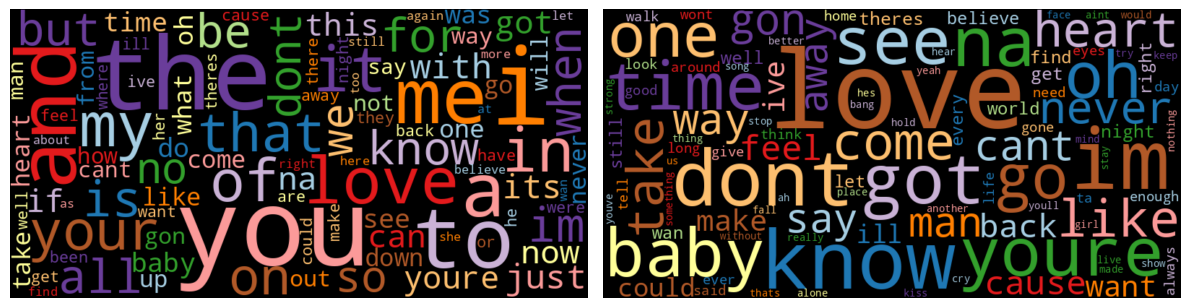

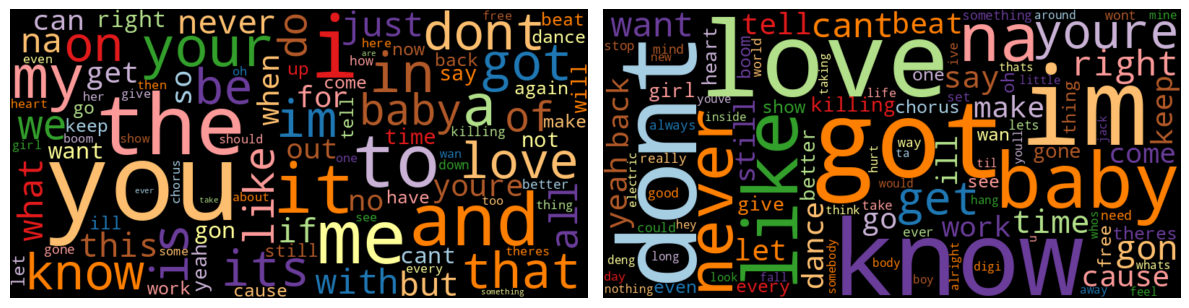

In [105]:
from nltk.tokenize import word_tokenize

def preprocess(doc):
    return word_tokenize(doc)

def generate_wordcloud_for_artist(df, artist_name, stopwords=None):
    corpus_df = df.loc[df['artist'] == artist_name]

    wordcloud_df = count_words(corpus_df, preprocess=preprocess, min_freq=1)

    # Plot the word cloud for the artist
    print(f"\nWord Cloud for {artist_name.capitalize()}:")
    plot_wc(wordcloud_df, sw=stopwords)

artists = ['cher', 'robyn']

for artist in artists:
    generate_wordcloud_for_artist(lyrics_data, artist, stopwords=sw)


Q: What observations do you have about these (relatively straightforward) wordclouds?

A: Both Cher and Robyn use similar lyrics such as love, baby and you. Robyn uses more vers such as beat and talking.